# Backpropagation

#### The goal of today's tutorial will be to build and train your first neural network!

* To keep things as simple as possible we will start by considering a perceptron with one hidden layer.

* We will tackle a binary-classification problem which cannot be solved with a linear classifier and that therefore is perfect for investigating the power of neural networks. The dataset which constitutes this problem is already created for you with the load_data() function.

* The neural network will have to be programmed and trained from scratch, meaning that you will have to define its structure yourself. This also means that the built in functionalities of the PyTorch library such as autodifferentiation **cannot** be used. In short, you will have to program the forward and backward pass yourself, together with the gradient descent algorithm.

 ![alt text](images/mlp.png)

** To succeed read the following instructions carefully**

* You are already provided with a simple basic python class which will constitute your neural network. The constructor requires you to specify the following parameters (investigate the data carefully in order to know how these parameters need to be defined).
    - number of input nodes
    - number of hidden units 
    - number of output nodes


* The constructor of the neural network also requires you to specify the weight matrices and bias vectors which will be the main components of your computation graph. To do so you can make use of the tensor operations we have seen in the first tutorial.


* Implementing a neural network consists in considering two main steps:
    - Forward-pass: computing the output of the network based on its weight matrices and bias vectors. Draw the computation graph with all the necessary operations on paper before jumping into the code.
    - Backward-pass: computing how different the predictions of the network are from what should be predicted and update the parameters of the network with the backpropagation algorithm. You are already provided with a loss function in the code which requires only slight modifications.


* If you want to challenge yourself you can extend the neural network as follows:
    - add multiple hidden layers of different sizes
    - explore different non-linear activation functions
    - investigate whether the network starts overfitting

In [1]:
import numpy as np
import torch
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
def load_data():
    N = 500
    gq = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7,
                                                  n_samples=N, n_features=2,
                                                  n_classes=2, shuffle=True,
                                                  random_state=1)
    return gq

In [6]:
gaussian_quantiles = load_data()
X, y = gaussian_quantiles

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

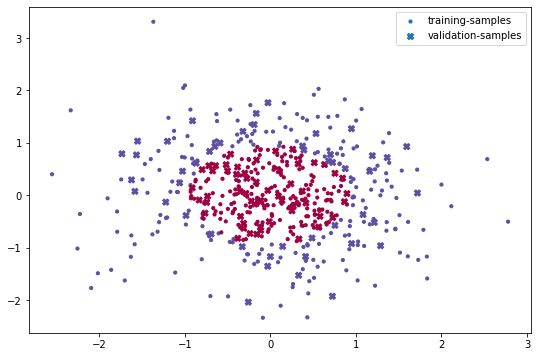

In [7]:
plt.figure(figsize=(9,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.', s=40, cmap=plt.cm.Spectral, label='training-samples')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='X', s=40, cmap=plt.cm.Spectral, label='validation-samples')
plt.legend()
plt.show()

In [17]:
class NeuralNetwork:
    def __init__(self, n_in, n_hidden, n_out):
        self.n_x = n_in
        self.n_h = n_hidden
        self.n_y = n_out

        self.W1 = torch.rand(self.n_h, self.n_x) * 0.01
        self.b1 = torch.zeros(self.n_h, 1)
        self.W2 = torch.rand(self.n_y, self.n_h) * 0.01
        self.b2 = torch.zeros(self.n_y, 1)
                        
    def my_forward(self, torch_X):
        self.Z1 = self.W1.matmul(torch_X.t()) + self.b1
        self.A1 = torch.tanh(self.Z1)
        self.Z2 = self.W2.matmul(self.A1) + self.b2
        self.A2 = torch.sigmoid(self.Z2)  
        
    def my_backward(self, torch_X, torch_y):
        m = torch_X.shape[0]
        
        self.dZ2 = self.A2 - torch_y
        
        self.dW2 = (1. / m) * torch.matmul(self.dZ2, self.A1.t())
        self.db2 = (1. / m) * torch.sum(self.dZ2, dim=1, keepdim=True)
        self.dZ1 = torch.mul(torch.matmul(self.W2.t(), self.dZ2), 1 - torch.pow(self.A1, 2))
        self.dW1 = (1. / m) * torch.matmul(self.dZ1, torch_X)
        self.db1 = (1. / m) * torch.sum(self.dZ1, dim=1, keepdim=True)
        
    def train(self, training_X, training_y, validation_X, validation_y, epochs, learning_rate):
        m = training_X.shape[0]
        for e in range(epochs):
            
            self.my_forward(training_X)
        
            training_loss = -torch.sum(torch.mul(torch.log(self.A2), training_y) + torch.mul(torch.log(1-self.A2),  (1 - training_y))) / m
        
            self.my_backward(training_X, training_y)
            
            self.W1 -= learning_rate * self.dW1
            self.b1 -= learning_rate * self.db1
            self.W2 -= learning_rate * self.dW2
            self.b2 -= learning_rate * self.db2
            
            if e % 500 == 0:
                m = validation_X.shape[0]
                self.my_forward(validation_X)
                validation_loss = -torch.sum(torch.mul(torch.log(self.A2), validation_y) + torch.mul(torch.log(1-self.A2),  (1 - validation_y))) / m
                print("Training loss: {}".format(training_loss))
                print("Validation loss: {}".format(validation_loss))
            
training_X = torch.from_numpy(X_train).float()
training_y = torch.from_numpy(y_train).float()

validation_X = torch.from_numpy(X_test).float()
validation_y = torch.from_numpy(y_test).float()

nn = NeuralNetwork(2, 10, 1)
nn.train(training_X, training_y, validation_X, validation_y, 5000, 0.3)

Training loss: 0.693142294883728
Validation loss: 0.693205714225769
Training loss: 2.7694144248962402
Validation loss: 0.6927375793457031
Training loss: 2.7656068801879883
Validation loss: 0.6902400255203247
Training loss: 2.080118179321289
Validation loss: 0.5835065245628357
Training loss: 0.7938096523284912
Validation loss: 0.2998144030570984
Training loss: 0.5751230120658875
Validation loss: 0.2744477093219757
Training loss: 0.512744665145874
Validation loss: 0.25709518790245056
Training loss: 0.4712125062942505
Validation loss: 0.23876674473285675
Training loss: 0.4399084150791168
Validation loss: 0.22361713647842407
Training loss: 0.41530394554138184
Validation loss: 0.21179886162281036
